# Churn Analysis And Prediction  

The project focuses on analysing data of a telecommunication provider and to predict if the customer churn to other service providers. 

* The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:
<br>

* "state", string. 2-letter code of the US state of customer residence
* "account_length", numerical. Number of months the customer has been with the current telco provider
* "area_code", string="area_code_AAA" where AAA = 3 digit area code.
* "international_plan", (yes/no). The customer has international plan.
* "voice_mail_plan", (yes/no). The customer has voice mail plan.
* "number_vmail_messages", numerical. Number of voice-mail messages.
* "total_day_minutes", numerical. Total minutes of day calls.
* "total_day_calls", numerical. Total minutes of day calls.
* "total_day_charge", numerical. Total charge of day calls.
* "total_eve_minutes", numerical. Total minutes of evening calls.
* "total_eve_calls", numerical. Total number of evening calls.
* "total_eve_charge", numerical. Total charge of evening calls.
* "total_night_minutes", numerical. Total minutes of night calls.
* "total_night_calls", numerical. Total number of night calls.
* "total_night_charge", numerical. Total charge of night calls.
* "total_intl_minutes", numerical. Total minutes of international calls.
* "total_intl_calls", numerical. Total number of international calls.
* "total_intl_charge", numerical. Total charge of international calls
* "number_customer_service_calls", numerical. Number of calls to customer service
* "churn", (yes/no). Customer churn - target variable. 


### Data Preprocessing and Visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [4]:
df= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [166]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [130]:
def visualization():
    print(df.shape)
    print('------------------------------------------------------------')
    print(df.info())         
    print('------------------------------------------------------------')
    print(df.iloc[0])
    print('------------------------------------------------------------')

visualization()

(4250, 20)
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 

In [5]:
df.duplicated().sum()

0

In [132]:
# df.TotalCharges.value_counts() 
test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

##### change datatype

In [6]:
df.area_code= df.area_code.astype('category')
test.area_code= test.area_code.astype('category')
df['state']=df['state'].astype('category')
test['state']=test['state'].astype('category')

##### change YES NO to binary values

In [7]:
yes_binary= {'yes':'1','no': '0'} 
df['international_plan']=df['international_plan'].map(yes_binary).astype('int64')
test['international_plan']=test['international_plan'].map(yes_binary).astype('int64')
df['voice_mail_plan']=df['voice_mail_plan'].map(yes_binary).astype('int64')
test['voice_mail_plan']=test['voice_mail_plan'].map(yes_binary).astype('int64')

In [48]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [8]:
num_cols = df._get_numeric_data().columns
cate_cols = list(set(df.columns)-set(num_cols))
print(len(num_cols),",", len(cate_cols))

17 , 3


In [11]:
num_cols

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')

In [9]:
df['churn']=df['churn'].map(yes_binary).astype('int64') 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


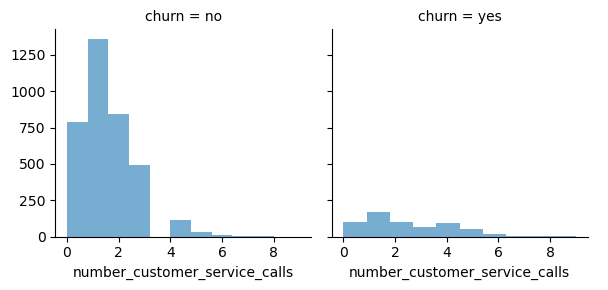

In [23]:
p= sns.FacetGrid(df,col='churn')
p.map(plt.hist,'number_customer_service_calls',alpha=0.6)      
p.add_legend()                                
plt.show()

#### Boxplot

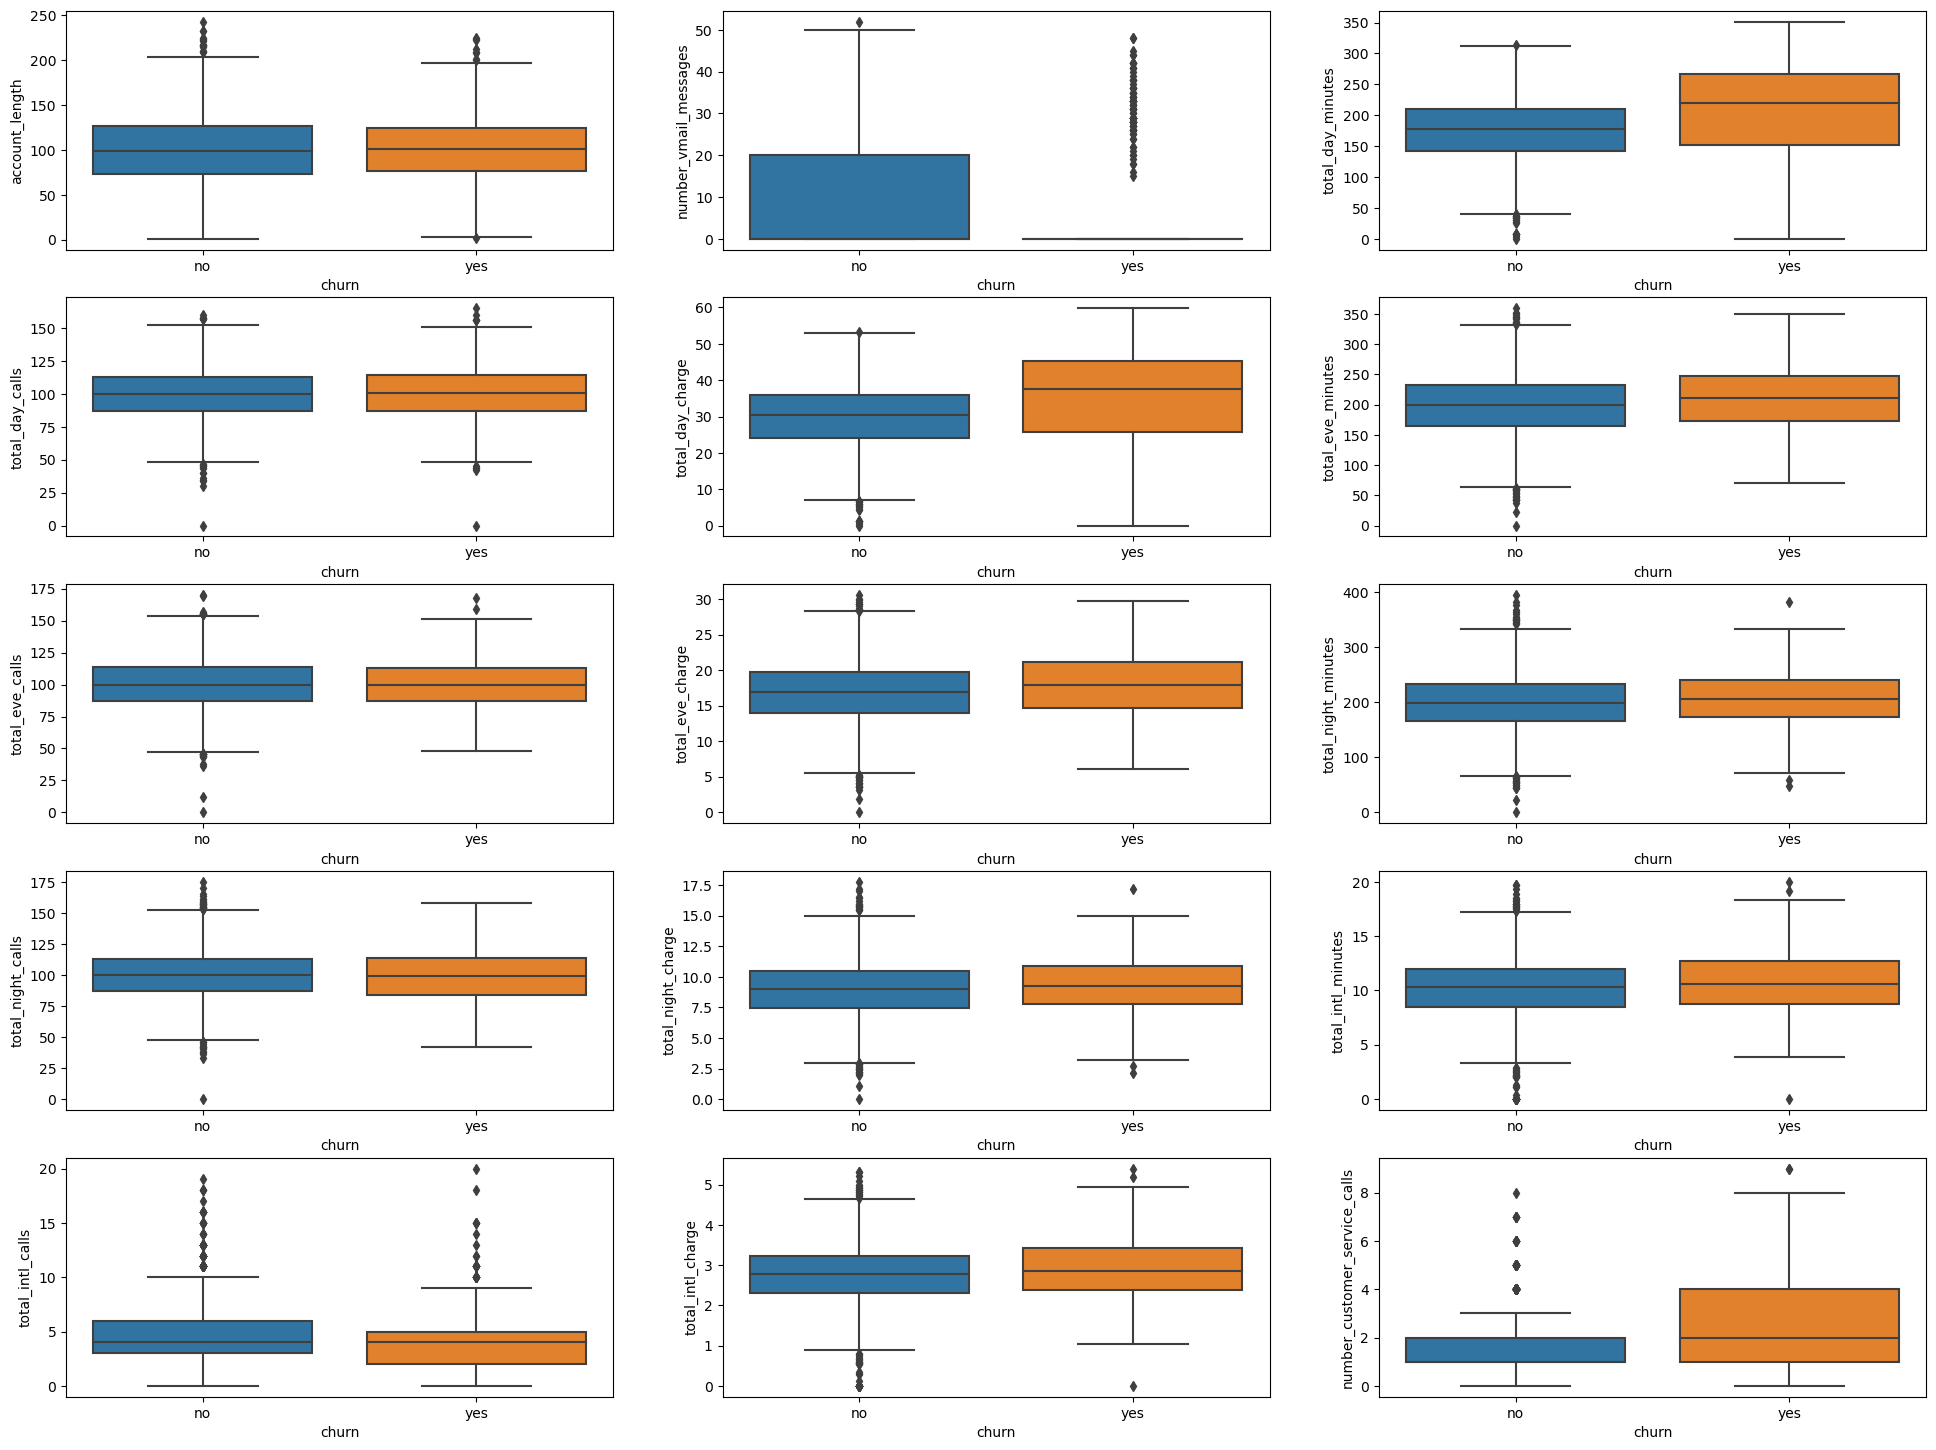

In [22]:
fig, axes = plt.subplots(5,3 , figsize=(24,18))           
axes = axes.flatten()
features = num_cols                              
for i in range(len(features)):
    sns.boxplot(x='churn',y= features[i],data= df,ax=axes[i])
plt.show()

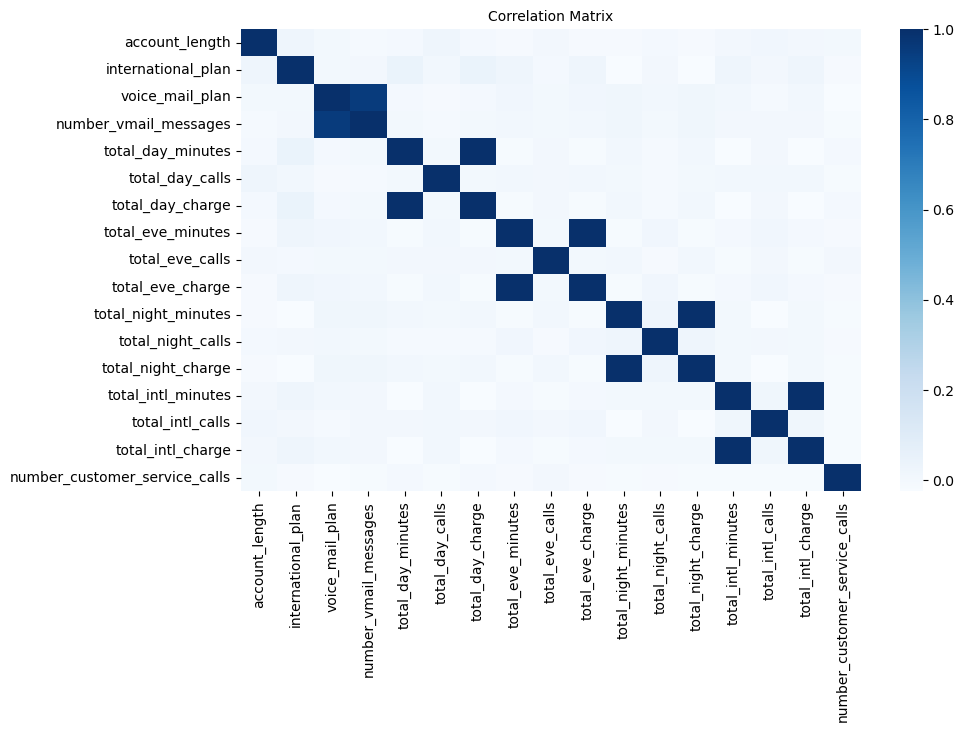

In [138]:
plt.figure(figsize=(10,6))
plt.title('Correlation Matrix', fontsize=10)
sns.heatmap(df[num_cols].corr(), cmap='Blues')
plt.show()

* There is no significant correlation between any feautures

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


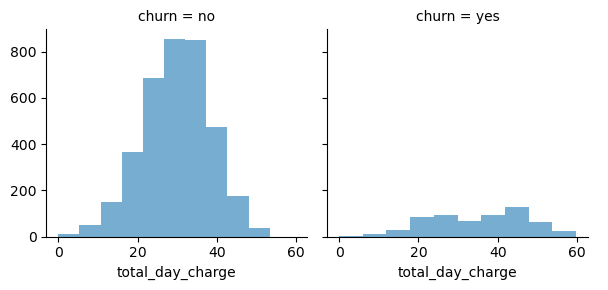

In [31]:
p= sns.FacetGrid(df,col='churn')
p.map(plt.hist,'total_day_charge',alpha=0.6)      
p.add_legend()                                
plt.show()

#### State Wise Churn Rate

In [139]:
churn_rate = df.groupby('state').agg(total=('churn', 'size'), churned=('churn', 'sum')).reset_index()

In [140]:
churn_rate['rate']= churn_rate['churned']/churn_rate['total'] 
churn_rate.sort_values(by='rate',ascending=False)

,state,total,churned,rate
31,NJ,96,26,0.270833
4,CA,39,10,0.256410
47,WA,80,18,0.225000
20,MD,86,19,0.220930
26,MT,80,17,0.212500
36,OK,78,16,0.205128
33,NV,83,17,0.204819
40,SC,72,14,0.194444
43,TX,98,19,0.193878
25,MS,82,15,0.182927


##### Skewness

In [86]:
df[num_cols].skew()

account_length                   0.122327
international_plan               2.800109
voice_mail_plan                  1.084960
number_vmail_messages            1.373091
total_day_minutes               -0.006910
total_day_calls                 -0.085812
total_day_charge                -0.006913
total_eve_minutes               -0.030415
total_eve_calls                 -0.020812
total_eve_charge                -0.030388
total_night_minutes              0.008491
total_night_calls                0.005273
total_night_charge               0.008445
total_intl_minutes              -0.241360
total_intl_calls                 1.360122
total_intl_charge               -0.241671
number_customer_service_calls    1.082692
dtype: float64

##### Variable transformation

In [90]:
from scipy.special import boxcox1p

skew_cols = ['international_plan', 'number_vmail_messages', 'total_intl_calls']
df_logs = df[skew_cols]
df_boxcox = df[skew_cols]
df_sqr_rt = df[skew_cols]
df_cb_rt = df[skew_cols]

for i in skew_cols:
  df_logs.loc[:,i] = np.log(df_logs[i]+1)
  df_sqr_rt.loc[:,i] = np.sqrt(df_sqr_rt)
  df_cb_rt.loc[:,i] = np.cbrt(df_cb_rt)
  df_boxcox.loc[:,i] = boxcox1p(df_boxcox[i], 0.1)

In [94]:
"---log", df_logs.skew(), "---boxcox", df_boxcox.skew(), "---sqrt", df_sqr_rt.skew(), "---cubert", df_cb_rt.skew()

('---log',
 international_plan       2.800109
 number_vmail_messages    1.117554
 total_intl_calls        -0.176811
 dtype: float64,
 '---boxcox',
 international_plan       2.800109
 number_vmail_messages    1.128101
 total_intl_calls        -0.023083
 dtype: float64,
 '---sqrt',
 international_plan       2.800109
 number_vmail_messages    1.169945
 total_intl_calls         0.260519
 dtype: float64,
 '---cubert',
 international_plan       2.800109
 number_vmail_messages    1.125958
 total_intl_calls        -0.447772
 dtype: float64)

In [97]:
df['number_vmail_messages'] = df_logs['number_vmail_messages']
df['international_plan'] = df_logs['international_plan']
df['total_intl_calls'] = df_boxcox['total_intl_calls']

In [170]:
df['state']=df['state'].astype('category')
df_dummies= pd.get_dummies(df)

In [171]:
df_dummies.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churn',
       'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI',
       'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY',
       'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN',
       'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD',
       'state_TN', 'state_TX',

In [172]:
shuffled= df_dummies.sample(frac=1).reset_index().drop('index',axis=1)

### Modelling

In [158]:
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import StandardScaler               

In [173]:
train_x= shuffled.loc[0:3850,:].drop('churn',axis=1)
test_x= shuffled.loc[3851:,:].drop('churn',axis=1)
train_y= shuffled.loc[0:3850,'churn']
test_y= shuffled.loc[3851:,'churn']    

In [174]:
import statsmodels.api as sm

In [175]:
model_logit= sm.Logit(train_y,sm.add_constant(train_x.astype(float))).fit() 

Optimization terminated successfully.
         Current function value: 0.301294
         Iterations 8


In [176]:
print(model_logit.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3851
Model:                          Logit   Df Residuals:                     3781
Method:                           MLE   Df Model:                           69
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.2610
Time:                        16:00:11   Log-Likelihood:                -1160.3
converged:                       True   LL-Null:                       -1570.1
Covariance Type:            nonrobust   LLR p-value:                7.398e-129
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -6.5413   4.32e+06  -1.51e-06      1.000   -8.47e+06    8.47e+06
account_length                    0.0010      0.001      0.725      0.468 

### Model Evaluation

In [177]:
yhat= model_logit.predict(sm.add_constant(test_x.astype(float)))

In [178]:
y_all= list(map(round,yhat))

In [179]:
from sklearn.metrics import (confusion_matrix,accuracy_score)

In [180]:
tn, fp, fn, tp = confusion_matrix(test_y,y_all).ravel()
print("tn:",tn, "fp:", fp,"fn:", fn, "fp:", tp)
accuracy = accuracy_score(test_y,y_all)
print("accuracy:", accuracy)
## precision and recall
precision= tp/(tp+fp)
print("precision",precision) 
recall= tp/(tp+fn) 
print("recall", recall)

tn: 335 fp: 11 fn: 38 fp: 15
accuracy: 0.8771929824561403
precision 0.5769230769230769
recall 0.2830188679245283


##### Increasing recall

In [182]:
y_lower_th= [ 1 if x >= 0.4 else 0 for x in yhat]
tn1, fp1, fn1, tp1 = confusion_matrix(test_y,y_lower_th).ravel()

In [183]:
recall1= tp1/(tp1+fn1) 
print("recall1", recall1) 
precision1 = tp1/(tp1+fp1)
print("precision",precision1)

recall1 0.41509433962264153
precision 0.4888888888888889


In [187]:
(tn1, fp1, fn1, tp1)

(323, 23, 31, 22)

In [186]:
(tn,fp,fn,tp)

(335, 11, 38, 15)

In [188]:
print("accuracy:",accuracy_score(test_y,y_lower_th))

accuracy: 0.8646616541353384


### Specifying the formula for the model (smf.logit())

In [191]:
train_small= train_x.iloc[:,0:3]
train_small['account_length']=pd.to_numeric(train_small['account_length'])
train_small['international_plan']=pd.to_numeric(train_small['international_plan'])
train_small['voice_mail_plan']=pd.to_numeric(train_small['voice_mail_plan'])

In [196]:
model_small= smf.logit(formula='churn~ account_length+international_plan+voice_mail_plan',data=df_dummies).fit()

Optimization terminated successfully.
         Current function value: 0.373124
         Iterations 7


In [197]:
print(model_small.summary())                    

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 4250
Model:                          Logit   Df Residuals:                     4246
Method:                           MLE   Df Model:                            3
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                 0.08152
Time:                        18:07:55   Log-Likelihood:                -1585.8
converged:                       True   LL-Null:                       -1726.5
Covariance Type:            nonrobust   LLR p-value:                 9.976e-61
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.9882      0.129    -15.365      0.000      -2.242      -1.735
account_length         0.0011      0.001      0.905      0.365      -0.001       0.003
international_plan  

In [198]:
df=pd.read_html(model_small.summary().tables[1].as_html(),header=0,index_col=0)[0]

In [199]:
df

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.9882,0.129,-15.365,0.000,-2.242,-1.735
account_length,0.0011,0.001,0.905,0.365,-0.001,0.003
international_plan,1.7979,0.116,15.461,0.000,1.570,2.026
voice_mail_plan,-0.9699,0.129,-7.545,0.000,-1.222,-0.718


In [200]:
df.loc['Intercept','coef']

-1.9882

In [201]:
### linear egrression = ax+b

## exp(ax+b)/1+exp(ax+b)

np.exp(df.loc['Intercept','coef']+df.loc['account_length','coef']* train_small.loc[0,'account_length']+
      +df.loc['international_plan','coef']* train_small.loc[0,'international_plan']+
      +df.loc['voice_mail_plan','coef']* train_small.loc[0,'voice_mail_plan'])/(1+np.exp(df.loc['Intercept','coef']+df.loc['account_length','coef']* train_small.loc[0,'account_length']+
      +df.loc['international_plan','coef']* train_small.loc[0,'international_plan']+
      +df.loc['voice_mail_plan','coef']* train_small.loc[0,'voice_mail_plan']))





0.1329757690960741

### Odds Ratio  

Probability Odds = (Successful Outcomes) / Total Outcomes

In [202]:
### what is the odds ratio that a customer will churn if I increase the account lenght by one month

np.exp(df.loc['account_length','coef'])


1.0011006052218943

In [203]:
### what is the odds ratio that a customer will churn if I have a voice mail plan
np.exp(df.loc['voice_mail_plan','coef'])


0.37912094830268755

### References 

* https://baremetrics.com/academy/churn-prediction-can-improve-business 
* https://www.udemy.com/course/ra-retail-customer-analytics-and-trade-area-modeling/ 
* https://userpilot.com/blog/churn-analytics/  